In [1]:
# IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# SAVE KAPRSAC JET FUEL PRICES IN A DATAFRAME
jet_fuel = pd.read_csv("KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set
# CLEAN UP DATA TO PERFORM GROUPBY ANALYSIS
jet_fuel['YEAR'] = jet_fuel['Date'].astype(str).str[0:4]
jet_fuel['MONTH'] = jet_fuel['Date'].astype(str).str[5:7]
del jet_fuel['Date']

In [4]:
#CHANGE NUMERICAL MONTH TO MONTHS
month_lookup = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
                '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October',
                '11': 'November','12': 'December'}
jet_fuel['MONTH'] = jet_fuel['MONTH'].apply(lambda x: month_lookup[x])
jet_fuel['MONTH YEAR'] = jet_fuel['MONTH'] + ' ' +  jet_fuel['YEAR']
jet_fuel.set_index('MONTH YEAR')
# FIND MEAN OF THESE PRICES
jet_fuel = jet_fuel.groupby(['MONTH YEAR']).mean()
jet_fuel

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
MONTH YEAR,
April 1990,0.540045
April 1991,0.552773
April 1992,0.545238
April 1993,0.551158
April 1994,0.469050
...,...
September 2015,1.392952
September 2016,1.321000
September 2017,1.778789


In [5]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
dom_flight = pd.read_csv('USCarrier_Traffic_DOM.csv', sep='","', engine='python', skiprows=1)
dom_flight.drop(dom_flight.tail(1).index,inplace=True) # drop last column
# RENAME COLUMNS
dom_flight.index.name = 'Period'
dom_flight.rename(columns={'Unit: (000)': 'Total(DOM)'}, inplace=True)
# CLEANUP DATA
dom_flight['PERIOD'] = dom_flight.index
dom_flight['PERIOD'] = dom_flight['PERIOD'].astype(str).str[1:]
dom_flight.set_index('PERIOD')
dom_flight['Total(DOM)'] = dom_flight['Total(DOM)'].astype(str).str[:-1]
dom_flight.set_index('PERIOD', inplace=True)
# IMPORT BTS INTERNATIONAL DATA DEPARTURES PERFORMED
intl_flight = pd.read_csv('USCarrier_Traffic_INTL.csv', sep='","', engine='python', skiprows=1)
intl_flight.drop(intl_flight.tail(1).index,inplace=True)
# RENAME COLUMNS
intl_flight.index.name = 'Period'
intl_flight.rename(columns={'Unit: (000)': 'Total(INTL)'}, inplace=True)
# CLEANUP DATA
intl_flight['PERIOD'] = intl_flight.index
intl_flight['PERIOD'] = intl_flight['PERIOD'].astype(str).str[1:]
intl_flight.set_index('PERIOD')
intl_flight['Total(INTL)'] = intl_flight['Total(INTL)'].astype(str).str[:-1]
intl_flight.set_index('PERIOD', inplace=True)
# CREATE COMBINED FLIGHT DATAFRAME
combined_flight = dom_flight.copy()
combined_flight['Total(INTL)'] = intl_flight['Total(INTL)']
combined_flight['TOTAL'] = combined_flight['Total(DOM)'].astype(int) + combined_flight['Total(INTL)'].astype(int)
combined_flight

,Total(DOM),Total(INTL),TOTAL
PERIOD,,,
January 2000,623794,51459,675253
February 2000,605936,49157,655093
March 2000,667027,54263,721290
April 2000,635767,52826,688593
May 2000,672835,55358,728193
...,...,...,...
December 2019,729109,74909,804018
January 2020,708984,73377,782361
February 2020,668537,67801,736338


In [12]:
# Combine two tables together since they have the same index:
flight_and_fuel = pd.concat([combined_flight, jet_fuel], axis=1) 
# Get rid of NA values since flight data is of smaller range:
flight_and_fuel = flight_and_fuel[flight_and_fuel['Total(DOM)'].notna()]
flight_and_fuel['Year'] = flight_and_fuel.index.astype(str).str[-4:]
flight_and_fuel

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,Year
January 2000,623794,51459,675253.0,0.781650,2000
February 2000,605936,49157,655093.0,0.780950,2000
March 2000,667027,54263,721290.0,0.768500,2000
April 2000,635767,52826,688593.0,0.719500,2000
May 2000,672835,55358,728193.0,0.763409,2000
...,...,...,...,...,...
December 2019,729109,74909,804018.0,1.891773,2019
January 2020,708984,73377,782361.0,1.769727,2020
February 2020,668537,67801,736338.0,1.513350,2020
March 2020,621760,53870,675630.0,0.940130,2020


In [8]:
#IMPORT NET INCOME STATEMENTS
net_income = pd.read_html('Net_Income.xls')
net_income = net_income[0] # turn html file into dataframe

In [9]:
net_income = net_income[net_income['Quarter'] != 'TOTAL'] # REMOVE TOTAL COLUMNS
net_income['Year'] = net_income['Year'].astype(str) # TURN TO STRING SO OUTER JOIN IS POSSIBLE
net_income

,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
0,2000,1,139162,58927,-68918,-106308,839,23702
1,2000,2,1570500,-86040,250371,154724,9541,1899096
2,2000,3,548903,33056,226224,83675,45470,937327
3,2000,4,-267068,6639,-95916,5533,23388,-327425
5,2001,1,-822384,76822,-59644,-101160,-3410,-909776
...,...,...,...,...,...,...,...,...
95,2019,1,2738558,269912,-146614,-143659,-25952,2692244
96,2019,2,4894087,337052,278518,-275831,17323,5251150
97,2019,3,4363439,477840,323253,-191276,-50583,4922673
98,2019,4,3738977,465079,-76833,-340004,-189151,3598068


In [16]:
#COMBINE BOTH DATA FRAMES
corr = pd.merge(net_income, flight_and_fuel, how='outer', on=['Year'])
corr

,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL_x,Total(DOM),Total(INTL),TOTAL_y,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
0,2000,1,139162,58927,-68918,-106308,839,23702,623794,51459,675253.0,0.781650
1,2000,1,139162,58927,-68918,-106308,839,23702,605936,49157,655093.0,0.780950
2,2000,1,139162,58927,-68918,-106308,839,23702,667027,54263,721290.0,0.768500
3,2000,1,139162,58927,-68918,-106308,839,23702,635767,52826,688593.0,0.719500
4,2000,1,139162,58927,-68918,-106308,839,23702,672835,55358,728193.0,0.763409
...,...,...,...,...,...,...,...,...,...,...,...,...
959,2019,4,3738977,465079,-76833,-340004,-189151,3598068,729109,74909,804018.0,1.891773
960,2020,1,-3226298,-251044,-924756,-553586,13600,-4942084,708984,73377,782361.0,1.769727
961,2020,1,-3226298,-251044,-924756,-553586,13600,-4942084,668537,67801,736338.0,1.513350
962,2020,1,-3226298,-251044,-924756,-553586,13600,-4942084,621760,53870,675630.0,0.940130


In [20]:
#RENAMING COLUMNS TO BE CLEAR
corr.rename(columns={'TOTAL_x': 'ALL REGIONS QUARTERLY NET INCOME'}, inplace=True)
corr.rename(columns={'DOMESTIC': 'DOMESTIC FLIGHTS QUARTERLY NET INCOME'}, inplace=True)
corr.rename(columns={'LATIN AMERICA': 'LATIN AMERICA FLIGHTS QUARTERLY NET INCOME'}, inplace=True)
corr.rename(columns={'ATLANTIC': 'ATLANTIC FLIGHTS QUARTERLY NET INCOME'}, inplace=True)
corr.rename(columns={'PACIFIC': 'PACIFIC FLIGHTS QUARTERLY NET INCOME'}, inplace=True)
corr.rename(columns={'INTERNATIONAL': 'INTERNATIONAL FLIGHTS QUARTERLY NET INCOME'}, inplace=True)
corr.rename(columns={'Total(DOM)': 'DOMESTIC FLIGHT DEPARTURES'}, inplace=True)
corr.rename(columns={'Total(INTL)': 'INTERNATIONAL FLIGHT DEPARTURES'}, inplace=True)
corr.rename(columns={'TOTAL_y': 'ALL FLIGHT DEPARTURES'}, inplace=True)
corr

,Year,Quarter,DOMESTIC FLIGHTS QUARTERLY NET INCOME,LATIN AMERICA FLIGHTS QUARTERLY NET INCOME,ATLANTIC FLIGHTS QUARTERLY NET INCOME,PACIFIC FLIGHTS QUARTERLY NET INCOME,INTERNATIONAL FLIGHTS QUARTERLY NET INCOME,ALL REGIONS QUARTERLY NET INCOME,DOMESTIC FLIGHT DEPARTURES,INTERNATIONAL FLIGHT DEPARTURES,ALL FLIGHT DEPARTURES,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
0,2000,1,139162,58927,-68918,-106308,839,23702,623794,51459,675253.0,0.781650
1,2000,1,139162,58927,-68918,-106308,839,23702,605936,49157,655093.0,0.780950
2,2000,1,139162,58927,-68918,-106308,839,23702,667027,54263,721290.0,0.768500
3,2000,1,139162,58927,-68918,-106308,839,23702,635767,52826,688593.0,0.719500
4,2000,1,139162,58927,-68918,-106308,839,23702,672835,55358,728193.0,0.763409
...,...,...,...,...,...,...,...,...,...,...,...,...
959,2019,4,3738977,465079,-76833,-340004,-189151,3598068,729109,74909,804018.0,1.891773
960,2020,1,-3226298,-251044,-924756,-553586,13600,-4942084,708984,73377,782361.0,1.769727
961,2020,1,-3226298,-251044,-924756,-553586,13600,-4942084,668537,67801,736338.0,1.513350
962,2020,1,-3226298,-251044,-924756,-553586,13600,-4942084,621760,53870,675630.0,0.940130


In [33]:
#BEGIN CORRELATION HEATMAP:
#FIND CORRELATION BETWEEN ALL VARIABLES
correlation = corr.corr()

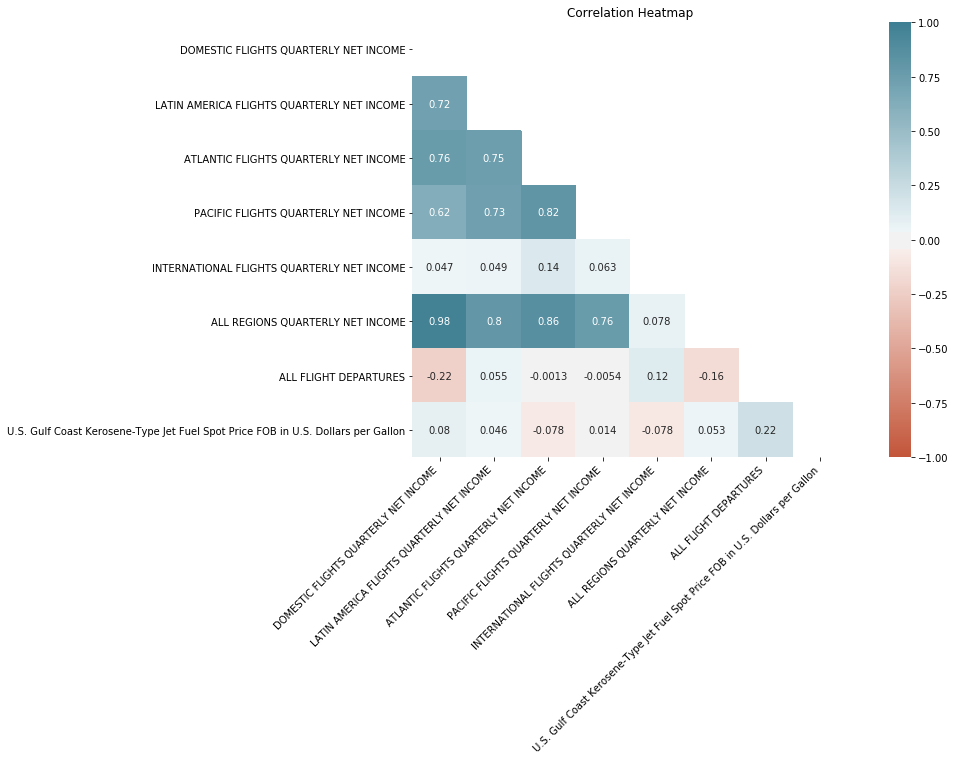

In [64]:
fig, ax = plt.subplots(figsize=(15,8))
mask = np.zeros(correlation.shape,dtype=bool)
mask[np.triu_indices(len(mask))] = True

ax = sns.heatmap(data=correlation,
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(20, 220, n=256),
                square=True,
                annot=True,
                mask=mask)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ax.set_title('Correlation Heatmap')

fig.savefig('overall-correlation.png', dpi=75, bbox_inches='tight')